In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Importing data to notebook


In [2]:
esc0 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\escolas\escolas20170101.csv',low_memory = False)
idebai = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\ideb\ideb_escolas_anosiniciais2005_2017.csv', encoding="latin-1")
idebaf = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\ideb\ideb_escolas_anosfinais2005_2017.csv', encoding="latin-1")

In [7]:
esc0.describe()

,Unnamed: 0,ano_censo,cod_escola_inep,tp_dependencia,num_matriculas,num_estudantes,num_estudantes_ensino_infantil,num_estudantes_ensino_fund_anos_iniciais,num_estudantes_ensino_fund_anos_finais,num_estudantes_ensino_medio_propedeutico,...,ideb_2015_anos_finais,tp_aee,tp_atividade_complementar,tp_localizacao_diferenciada,tp_indigena_lingua,co_lingua_indigena,cod_municipio,num_matriculas_ensino_integral,num_estudantes_ensino_integral,cod_ibge_uf
count,282362.000000,282362.0,2.823620e+05,282362.000000,185925.000000,185925.000000,185925.000000,185925.000000,185925.000000,185925.000000,...,29799.000000,282362.000000,282362.000000,185925.000000,282362.000000,2375.000000,2.823620e+05,70488.000000,70488.000000,282362.000000
mean,141180.500000,2017.0,2.985885e+07,3.086697,289.905440,263.029377,45.709071,82.425774,64.634718,42.640532,...,4.159072,0.108003,0.151005,0.113922,0.030900,161.114947,2.983943e+06,99.741176,99.739034,29.692193
std,81511.032692,0.0,9.356055e+06,0.601885,373.840122,345.225732,77.024842,139.097246,140.207852,148.883476,...,0.874669,0.319283,0.367244,0.517211,0.290188,181.261067,9.391309e+05,101.823060,101.820541,9.351371
min,0.000000,2017.0,1.100002e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.900000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100015e+06,1.000000,1.000000,11.000000
25%,70590.250000,2017.0,2.317088e+07,3.000000,59.000000,57.000000,0.000000,0.000000,0.000000,0.000000,...,3.500000,0.000000,0.000000,0.000000,0.000000,68.500000,2.306900e+06,35.000000,35.000000,23.000000
50%,141180.500000,2017.0,2.944356e+07,3.000000,160.000000,149.000000,12.000000,19.000000,0.000000,0.000000,...,4.200000,0.000000,0.000000,0.000000,0.000000,126.000000,2.930501e+06,77.000000,77.000000,29.000000
75%,211770.750000,2017.0,3.520377e+07,3.000000,391.000000,350.000000,61.000000,104.000000,62.000000,0.000000,...,4.800000,0.000000,0.000000,0.000000,0.000000,211.000000,3.531308e+06,127.000000,127.000000,35.000000
max,282361.000000,2017.0,5.308803e+07,4.000000,54896.000000,54712.000000,2247.000000,2199.000000,2222.000000,3312.000000,...,8.500000,2.000000,2.000000,6.000000,3.000000,999.000000,5.300108e+06,2221.000000,2221.000000,53.000000


In [8]:
esc0.head(5)

,Unnamed: 0,ano_censo,cod_escola_inep,regiao,unidade_federativa,mesoregiao,microregiao,municipio,tp_dependencia,tp_dependencia_desc,...,tp_indigena_lingua_desc,co_lingua_indigena,in_brasil_alfabetizado,in_final_semana,in_formacao_alternancia,cod_municipio,num_matriculas_ensino_integral,num_estudantes_ensino_integral,tp_integral,cod_ibge_uf
0,0,2017,11021012,Norte,Rondônia,Leste Rondoniense,Ji-Paraná,Vale do Paraíso,3,Municipal,...,NaN,NaN,False,False,False,1101807,NaN,NaN,False,11
1,1,2017,11037288,Norte,Rondônia,Leste Rondoniense,Ji-Paraná,Urupá,4,Privada,...,NaN,NaN,False,False,False,1101708,NaN,NaN,False,11
2,2,2017,11045787,Norte,Rondônia,Leste Rondoniense,Ariquemes,Machadinho D'Oeste,3,Municipal,...,NaN,NaN,False,False,False,1100130,NaN,NaN,False,11
3,3,2017,11010088,Norte,Rondônia,Leste Rondoniense,Ariquemes,Alto Paraíso,3,Municipal,...,NaN,NaN,False,False,False,1100403,NaN,NaN,False,11
4,4,2017,11040203,Norte,Rondônia,Leste Rondoniense,Ji-Paraná,Nova União,3,Municipal,...,NaN,NaN,False,False,False,1101435,NaN,NaN,False,11


In [4]:
esc1 = esc0[['num_estudantes_ensino_infantil','num_estudantes_ensino_fund_anos_iniciais','num_estudantes_ensino_fund_anos_finais','num_estudantes_ensino_medio_propedeutico','num_estudantes_fund_1_ano','num_estudantes_fund_2_ano','num_estudantes_fund_3_ano','num_estudantes_fund_4_ano','num_estudantes_fund_5_ano','num_estudantes_fund_6_ano','num_estudantes_fund_7_ano','num_estudantes_fund_8_ano','num_estudantes_fund_9_ano','num_estudantes_medio_1_serie','num_estudantes_medio_2_serie','num_estudantes_medio_3_serie','num_estudantes_medio_4_serie','num_estudantes_medio_nao_seriada','tp_situacao_funcionamento','num_salas_existentes','num_salas_utilizadas','num_funcionarios','num_professores','num_professores_em_regencia','num_professores_em_regencia_fund_ai','num_professores_em_regencia_fund_af','num_professores_em_regencia_ens_medio','cod_escola_inep','tp_dependencia','tp_rede','num_matriculas','num_estudantes','num_equip_tv','num_equip_videocassete','num_equip_dvd','num_equip_parabolica','num_equip_copiadora','num_equip_retroprojetor','num_equip_impressora','num_equip_impressora_mult','num_equip_som','num_equip_multimidia','num_equip_fax','num_equip_foto','num_computador','num_comp_administrativo','num_comp_aluno']]

In [5]:
esc2 = esc1.dropna()

Separação da database em Numeric Estruturais, Numeric Equipamentos, e Boolean, além de remover algumas colunas para ficar mais manejável. Inclui tambem algumas colunas para ajudar na identificação das escolas e na paridade das bases se depois for usalas em conjunto. Também inclui 'num_matriculas','num_estudantes' para posteriormente usar e checar se as correlações fazem sentido

In [6]:
numEst0 = esc2[['cod_escola_inep','tp_dependencia','tp_rede','num_matriculas','num_estudantes','num_estudantes_ensino_infantil','num_estudantes_ensino_fund_anos_iniciais','num_estudantes_ensino_fund_anos_finais','num_estudantes_ensino_medio_propedeutico','num_estudantes_fund_1_ano','num_estudantes_fund_2_ano','num_estudantes_fund_3_ano','num_estudantes_fund_4_ano','num_estudantes_fund_5_ano','num_estudantes_fund_6_ano','num_estudantes_fund_7_ano','num_estudantes_fund_8_ano','num_estudantes_fund_9_ano','num_estudantes_medio_1_serie','num_estudantes_medio_2_serie','num_estudantes_medio_3_serie','num_estudantes_medio_4_serie','num_estudantes_medio_nao_seriada','tp_situacao_funcionamento','num_salas_existentes','num_salas_utilizadas','num_funcionarios','num_professores','num_professores_em_regencia','num_professores_em_regencia_fund_ai','num_professores_em_regencia_fund_af','num_professores_em_regencia_ens_medio']]

In [7]:
numEqp0 = esc2[['cod_escola_inep','tp_dependencia','tp_rede','num_matriculas','num_estudantes','num_equip_tv','num_equip_videocassete','num_equip_dvd','num_equip_parabolica','num_equip_copiadora','num_equip_retroprojetor','num_equip_impressora','num_equip_impressora_mult','num_equip_som','num_equip_multimidia','num_equip_fax','num_equip_foto','num_computador','num_comp_administrativo','num_comp_aluno']]

Ver situação dos dados

In [144]:
#for c in numEqp0.columns:
#    print(numEqp0[c].value_counts())

In [145]:
#for c in numEst0.columns:
#    print(numEst0[c].value_counts())

In [5]:
numEqp0.isnull().sum()

num_matriculas               96437
num_salas_existentes         96906
cod_escola_inep                  0
tp_dependencia                   0
tp_rede                          0
num_equip_tv                     0
num_equip_videocassete           0
num_equip_dvd                    0
num_equip_parabolica             0
num_equip_copiadora              0
num_equip_retroprojetor          0
num_equip_impressora             0
num_equip_impressora_mult        0
num_equip_som                    0
num_equip_multimidia             0
num_equip_fax                    0
num_equip_foto                   0
num_computador                   0
num_comp_administrativo          0
num_comp_aluno                   0
dtype: int64

In [45]:
numEqp0.dtypes

cod_escola_inep               int64
tp_dependencia                int64
tp_rede                      object
num_equip_tv                  int64
num_equip_videocassete        int64
num_equip_dvd                 int64
num_equip_parabolica          int64
num_equip_copiadora           int64
num_equip_retroprojetor       int64
num_equip_impressora          int64
num_equip_impressora_mult     int64
num_equip_som                 int64
num_equip_multimidia          int64
num_equip_fax                 int64
num_equip_foto                int64
num_computador                int64
num_comp_administrativo       int64
num_comp_aluno                int64
dtype: object

In [46]:
numEst0.isnull().sum()

cod_escola_inep                                 0
tp_dependencia                                  0
tp_rede                                         0
num_matriculas                              96437
num_estudantes                              96437
num_estudantes_ensino_infantil              96437
num_estudantes_ensino_fund_anos_iniciais    96437
num_estudantes_ensino_fund_anos_finais      96437
num_estudantes_ensino_medio_propedeutico    96437
num_estudantes_fund_1_ano                   96437
num_estudantes_fund_2_ano                   96437
num_estudantes_fund_3_ano                   96437
num_estudantes_fund_4_ano                   96437
num_estudantes_fund_5_ano                   96437
num_estudantes_fund_6_ano                   96437
num_estudantes_fund_7_ano                   96437
num_estudantes_fund_8_ano                   96437
num_estudantes_fund_9_ano                   96437
num_estudantes_medio_1_serie                96437
num_estudantes_medio_2_serie                96437


In [47]:
numEst0.dtypes

cod_escola_inep                               int64
tp_dependencia                                int64
tp_rede                                      object
num_matriculas                              float64
num_estudantes                              float64
num_estudantes_ensino_infantil              float64
num_estudantes_ensino_fund_anos_iniciais    float64
num_estudantes_ensino_fund_anos_finais      float64
num_estudantes_ensino_medio_propedeutico    float64
num_estudantes_fund_1_ano                   float64
num_estudantes_fund_2_ano                   float64
num_estudantes_fund_3_ano                   float64
num_estudantes_fund_4_ano                   float64
num_estudantes_fund_5_ano                   float64
num_estudantes_fund_6_ano                   float64
num_estudantes_fund_7_ano                   float64
num_estudantes_fund_8_ano                   float64
num_estudantes_fund_9_ano                   float64
num_estudantes_medio_1_serie                float64
num_estudant

In [91]:
numEqp0.head()

,num_matriculas,num_salas_existentes,cod_escola_inep,tp_dependencia,tp_rede,num_equip_tv,num_equip_videocassete,num_equip_dvd,num_equip_parabolica,num_equip_copiadora,num_equip_retroprojetor,num_equip_impressora,num_equip_impressora_mult,num_equip_som,num_equip_multimidia,num_equip_fax,num_equip_foto,num_computador,num_comp_administrativo,num_comp_aluno
0,NaN,NaN,11021012,3,Municipal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,11037288,4,Privada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,11045787,3,Municipal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,11010088,3,Municipal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,11040203,3,Municipal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
numEqp0['tp_rede'].value_counts()

Municipal    180248
Privada       63680
Estadual      37668
Federal         766
Name: tp_rede, dtype: int64

In [95]:
idebaf['Rede'].value_counts()

Municipal    22610
Estadual     20959
Federal         38
Name: Rede, dtype: int64

In [ ]:
idebai['Rede'].value_counts()

In [27]:
for c in idebai.columns:
    idebai[c].replace('*','',inplace=True)    
    idebai[c].replace('-',np.nan,inplace=True)
    idebai[c].replace('ND',np.nan,inplace=True)
for c in idebai.columns:
    if c not in ['Nome_Municipio' ,'Nome_Escola','Rede','Co_UF']:
        idebai[c] = idebai[c].astype(float,copy=False)

Filtrando algumas colunas para preparar o merge e ter uma database simplificada para servir de Target para modelos futuros

In [26]:
idebai = idebai[idebai.columns.drop(list(idebai.filter(regex='TaxaAprovacao')))]
idebai = idebai[idebai.columns.drop(list(idebai.filter(regex='NotaProvaBrasil_MT')))]
idebai = idebai[idebai.columns.drop(list(idebai.filter(regex='NotaProvaBrasil_LP')))]
idebai = idebai[idebai.columns.drop(list(idebai.filter(regex='ProjecaoIdeb200')))]

idebaf = idebaf[idebaf.columns.drop(list(idebaf.filter(regex='TaxaAprovacao')))]
idebaf = idebaf[idebaf.columns.drop(list(idebaf.filter(regex='NotaProvaBrasil_MT')))]
idebaf = idebaf[idebaf.columns.drop(list(idebaf.filter(regex='NotaProvaBrasil_LP')))]
idebaf = idebaf[idebaf.columns.drop(list(idebaf.filter(regex='ProjecaoIdeb200')))]

In [28]:
idebai.shape


(59922, 33)

In [29]:
idebaf.shape

(43607, 33)

Limpando as bases ideb anos iniciais e ideb anos finais

In [30]:
for c in idebai.columns:
    idebai[c].replace('*','',inplace=True)    
    idebai[c].replace('-',np.nan,inplace=True)
    idebai[c].replace('ND',np.nan,inplace=True)
for c in idebai.columns:
    if c not in ['Nome_Municipio' ,'Nome_Escola','Rede','Co_UF']:
        idebai[c] = idebai[c].astype(float,copy=False)

In [33]:
for c in idebaf.columns:
    idebaf[c].replace('*','',inplace=True)    
    idebaf[c].replace('-',np.nan,inplace=True)
    idebaf[c].replace('ND',np.nan,inplace=True)
for c in idebaf.columns:
    if c not in ['Nome_Municipio' ,'Nome_Escola','Rede','Co_UF']:
        idebaf[c] = idebaf[c].astype(float,copy=False)

In [31]:
idebai['Ideb2017'].mean()

5.488659520655194

In [34]:
idebaf['Ideb2017'].mean()

4.43032119075596

Podemos observar uma diferença significativa na nota do Ideb e escolas de anos iniciais e anos finais, vamos explorar mais esse fato futuramente no notebook

Antes de concatenar, vou acrescentar uma coluna booleana, que diz se os valores da row são referentes aos anos iniciais ou aos anos finais da escola (algumas escolas terão 2 rows no df)

In [35]:
idebai['is_anosiniciais'] = 1
idebaf['is_anosiniciais'] = 0

In [36]:
idebt = pd.concat([idebai, idebaf])

In [37]:
idebt.shape

(103529, 34)

In [20]:
idebt.isnull().sum()

Co_UF                                 0
Cod_Municipio_Completo                0
Nome_Municipio                        0
Cod_Escola_Completo                   0
Nome_Escola                           0
Rede                                  0
IndicadorRendimento_2005          56925
IndicadorRendimento_2007          39110
IndicadorRendimento_2009          23244
IndicadorRendimento_2011          27799
IndicadorRendimento_2013          28651
IndicadorRendimento_2015          30316
IndicadorRendimento_2017          18538
NotaProvaBrasil_NotaMedia_2005    56925
NotaProvaBrasil_NotaMedia_2007    39110
NotaProvaBrasil_NotaMedia_2009    28101
NotaProvaBrasil_NotaMedia_2011    32275
NotaProvaBrasil_NotaMedia_2013    33704
NotaProvaBrasil_NotaMedia_2015    35188
NotaProvaBrasil_NotaMedia_2017    36471
Ideb2005                          56925
Ideb2007                          39110
Ideb2009                          28189
Ideb2011                          32305
Ideb2013                          33710


In [38]:
idebt2 = idebt.sort_values(by=['Cod_Escola_Completo'])

Guardando DataFrame idebt2 = idebai+idebaf simplificado

In [39]:
idebt2.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\ideb_escolas_anostotais(w_missingdata)2.csv')

Agora podemos focar nas numéricas dos dados esc0

In [40]:
numEst0.shape

(185456, 32)

In [41]:
numEqp0.shape

(185456, 20)

Temos que dar um merge que alinhe as bases numEst0 e num numEqp0 com a base idebt2, de modo que as escolas tenham as informações corretas nas linhas corretas, pra isso usamos como key o 'Cod_Escola_Completo'

Já que as bases numEqp0 e numEst0 são filhas da esc0, que possui muito mais samples que a database do ideb, podemos nos dar ao luxo de dropar as linhas que não possuem informações completas

In [42]:
numEqp0.rename(columns={'cod_escola_inep': 'Cod_Escola_Completo', 'tp_rede': 'Rede'}, inplace=True)
numEst0.rename(columns={'cod_escola_inep': 'Cod_Escola_Completo', 'tp_rede': 'Rede'}, inplace=True)


C:\Users\Filipe Prates\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [43]:
idebt2.shape

(103529, 34)

In [45]:
numEqp0.shape


(185456, 20)

In [46]:
result = pd.merge(idebt2,numEqp0,on=['Cod_Escola_Completo'])

In [47]:
result.shape

(100075, 53)

In [48]:
result.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\numericEqpEscola+idebt2.csv')

Muda o dtype das colunas para podermos observar as correlações entre os numéricos de equipamentos e o Ideb2017

In [49]:
for c in result.columns:
    if c not in ['Nome_Municipio' ,'Nome_Escola','Rede_x','Co_UF','Rede_y']:
        result[c] = result[c].astype(float,copy=False)

In [16]:
result.dtypes

Co_UF                              object
Cod_Municipio_Completo            float64
Nome_Municipio                     object
Cod_Escola_Completo               float64
Nome_Escola                        object
Rede_x                             object
IndicadorRendimento_2005          float64
IndicadorRendimento_2007          float64
IndicadorRendimento_2009          float64
IndicadorRendimento_2011          float64
IndicadorRendimento_2013          float64
IndicadorRendimento_2015          float64
IndicadorRendimento_2017          float64
NotaProvaBrasil_NotaMedia_2005    float64
NotaProvaBrasil_NotaMedia_2007    float64
NotaProvaBrasil_NotaMedia_2009    float64
NotaProvaBrasil_NotaMedia_2011    float64
NotaProvaBrasil_NotaMedia_2013    float64
NotaProvaBrasil_NotaMedia_2015    float64
NotaProvaBrasil_NotaMedia_2017    float64
Ideb2005                          float64
Ideb2007                          float64
Ideb2009                          float64
Ideb2011                          

In [55]:
corr_variables = ['num_matriculas','num_estudantes','num_equip_tv','num_equip_videocassete','num_equip_dvd','num_equip_parabolica','num_equip_copiadora','num_equip_retroprojetor','num_equip_impressora','num_equip_impressora_mult','num_equip_som','num_equip_multimidia','num_equip_fax','num_equip_foto','num_computador','num_comp_administrativo','num_comp_aluno']

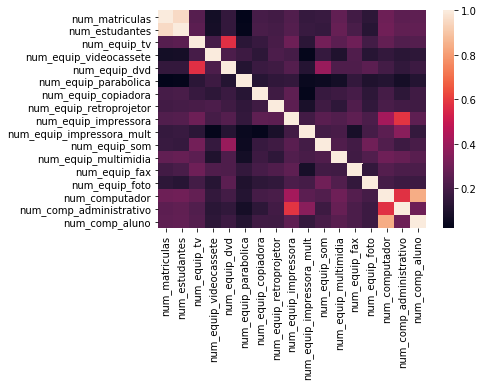

In [56]:
sns.heatmap(result[corr_variables].corr())

Algumas função que serão usadas no estudo de correlações

In [57]:
def textCorr(df,corr_variables,target):
    corrList = []
    for c in corr_variables:
        corrList.append(df[c].corr(df[target]))
        print(df[c].corr(df[target]))
        print(c)
        
def plotCorr(df,corr_variables,target,title):
    corrList = []
    for c in corr_variables:
        corrList.append(df[c].corr(df[target]))
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.bar(corr_variables,corrList)

In [58]:
textCorr(result,corr_variables,'Ideb2017')

0.051857774446222867
num_matriculas
0.0575177694346461
num_estudantes
0.15270439508059847
num_equip_tv
0.10374588803210626
num_equip_videocassete
0.17487751984179548
num_equip_dvd
0.008175787053009366
num_equip_parabolica
0.10424349198223018
num_equip_copiadora
0.11513334965071574
num_equip_retroprojetor
0.20536897986934685
num_equip_impressora
0.15947546398930068
num_equip_impressora_mult
0.2701687003691907
num_equip_som
0.15787764139431268
num_equip_multimidia
0.14603710979738427
num_equip_fax
0.13345072829013624
num_equip_foto
0.17514892630866438
num_computador
0.20505085612665527
num_comp_administrativo
0.1663073590111242
num_comp_aluno


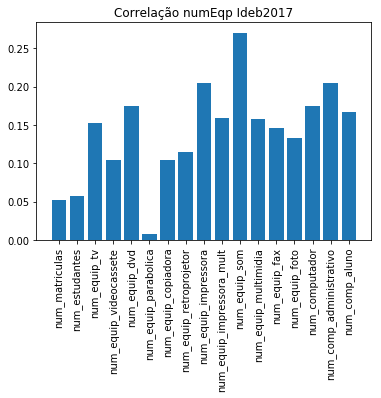

In [59]:
plotCorr(result,corr_variables,'Ideb2017','Correlação numEqp Ideb2017')


Resultados interessantes. Em geral qualquer num_equipamentos tem uma correlação positiva com o Ideb (o que faz sentido pois é um índice de mais capital sendo investido na escola), apenas o num_equipamentos_parabólicos tem uma correlação quase nula, talvez dado ao fato que se a escola precisa de um número maior de antenas parabólicas, ela fica em um lugar mais isolado, que pode inferir uma qualidade inferior na educação devido ao pior acesso à investimentos.

Também observamos que a quantidade de computadores e impressoras (os equipamentos mais diretamente úteis na aplicação do aprendizado) possuem uma correlação relativamente alta:

num_computador: 0.1753318331865507

num_comp_administrativo: 0.2051860872364397

num_equip_impressora: 0.20558748603069107

Mas talvez mais inexperadamente, o equipamento o qual o número mais se correlaciona com o desempenho no Ideb é o num_equip_som:

num_equip_som: 0.2703205388475583

Aplicaremos o mesmo procedimento para as variáveis numéricas de estrutura (numEst0)


In [62]:
result_est = pd.merge(idebt2,numEst0,on=['Cod_Escola_Completo'])

In [76]:
result_est.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\numericEstEscola+idebt2.csv')

In [63]:
for c in result_est.columns:
    if c not in ['Nome_Municipio' ,'Nome_Escola','Rede_x','Co_UF','Rede_y']:
        result_est[c] = result_est[c].astype(float,copy=False)

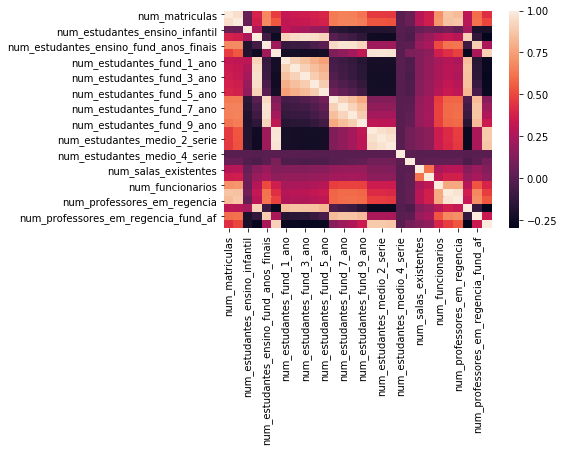

In [66]:
corr_variables2 = ['num_matriculas','num_estudantes','num_estudantes_ensino_infantil','num_estudantes_ensino_fund_anos_iniciais','num_estudantes_ensino_fund_anos_finais','num_estudantes_ensino_medio_propedeutico','num_estudantes_fund_1_ano','num_estudantes_fund_2_ano','num_estudantes_fund_3_ano','num_estudantes_fund_4_ano','num_estudantes_fund_5_ano','num_estudantes_fund_6_ano','num_estudantes_fund_7_ano','num_estudantes_fund_8_ano','num_estudantes_fund_9_ano','num_estudantes_medio_1_serie','num_estudantes_medio_2_serie','num_estudantes_medio_3_serie','num_estudantes_medio_4_serie','num_estudantes_medio_nao_seriada','num_salas_existentes','num_salas_utilizadas','num_funcionarios','num_professores','num_professores_em_regencia','num_professores_em_regencia_fund_ai','num_professores_em_regencia_fund_af','num_professores_em_regencia_ens_medio']
sns.heatmap(result_est[corr_variables2].corr())

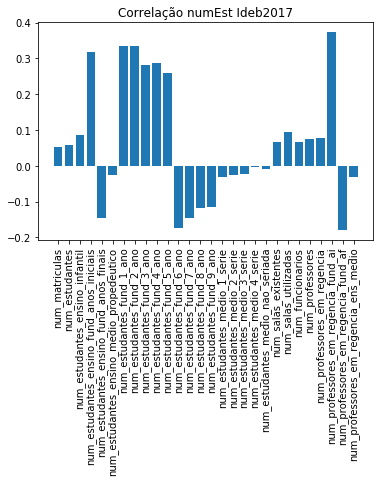

In [67]:
#textCorr(result_est,corr_variables2,'Ideb2017')
plotCorr(result_est,corr_variables2,'Ideb2017','Correlação numEst Ideb2017')

Mais um resultado interessante, existem 2 saltos significativos, exatamente na mudança entre o Ensino Fundamental 1, e o Ensino Fundamental 2, que se mostra como um ponto crítico para o resultados das escolas. Aparentemente existe uma correlação positiva em ter mais alunos do EF1,  ter melhores notas no ideb, como por exemplo:

num_estudantes_ensino_fund_anos_iniciais: 0.31682463434197594

num_estudantes_fund_1_ano: 0.3346559360359833


num_estudantes_fund_3_ano: 0.28118836404933917


num_estudantes_fund_5_ano: 0.2583480185207778

Mas uma correlação negativa com alunos do 6 ano para cima:

num_estudantes_fund_6_ano: -0.17258315253646347

num_estudantes_fund_8_ano: -0.11781285107896296

num_estudantes_medio_1_serie: -0.03126801070401666

num_estudantes_medio_3_serie: -0.021601523329622212


Para melhor entendermos o que está acontecendo, vamos plotar a correlação tambem com o Indice de Rendimento e as Notas da Prova Brasil



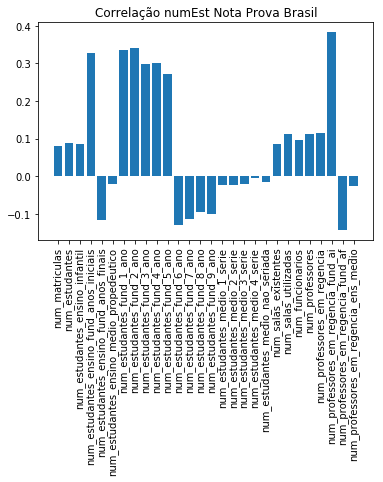

In [68]:
#textCorr(result_est,corr_variables2,'NotaProvaBrasil_NotaMedia_2017')
plotCorr(result_est,corr_variables2,'NotaProvaBrasil_NotaMedia_2017','Correlação numEst Nota Prova Brasil')

Podemos ver que a trend continua na Nota Prova Brasil, o que era de se esperar dado a alta correlação entre a nota da PB com o índice do Ideb

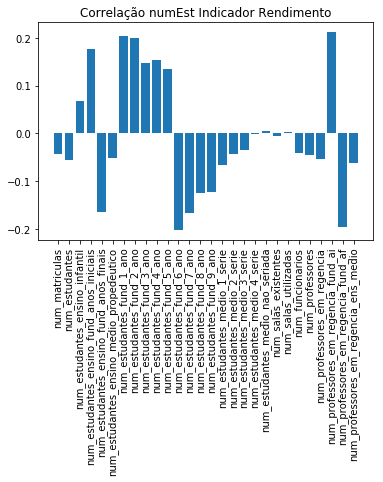

In [69]:
plotCorr(result_est,corr_variables2,'IndicadorRendimento_2017','Correlação numEst Indicador Rendimento')
#textCorr(result_est,corr_variables2,'IndicadorRendimento_2017')

No Indicador de Rendimento podemos ver uma cena parecida, porém com valores mais modestos, claramente existe uma ligação forte entre o fato da escolar ser de "anos iniciais" e ter um Ideb melhor, felizmente inclui a coluna que determina se a linha é de "anos iniciais", podemos ver como isso influencia no Ideb, o Indicador de Rendimento, e a NBP

In [32]:
print(result_est['is_anosiniciais'].corr(result_est['IndicadorRendimento_2017']))
print(result_est['is_anosiniciais'].corr(result_est['NotaProvaBrasil_NotaMedia_2017']))
print(result_est['is_anosiniciais'].corr(result_est['Ideb2017']))

0.33159034574794277
0.40581352536211224
0.43063697860338657


In [33]:
result_ai = result_est.loc[result_est['is_anosiniciais']==1]
result_ai['Ideb2017'].describe()

count    41503.000000
mean         5.488962
std          1.156717
min          1.100000
25%          4.700000
50%          5.600000
75%          6.300000
max          9.900000
Name: Ideb2017, dtype: float64

In [34]:
result_af = result_est.loc[result_est['is_anosiniciais']==0]
result_af['Ideb2017'].describe()

count    25523.000000
mean         4.430757
std          0.932722
min          0.900000
25%          3.800000
50%          4.500000
75%          5.100000
max          8.500000
Name: Ideb2017, dtype: float64

In [35]:
result_ai = result_est.loc[result_est['is_anosiniciais']==1]
result_ai['NotaProvaBrasil_NotaMedia_2017'].describe()

count    41508.000000
mean         5.866688
std          0.972547
min          2.394904
25%          5.182281
50%          5.921215
75%          6.554690
max          9.907636
Name: NotaProvaBrasil_NotaMedia_2017, dtype: float64

In [36]:
result_af = result_est.loc[result_est['is_anosiniciais']==0]
result_af['NotaProvaBrasil_NotaMedia_2017'].describe()

count    25531.000000
mean         5.047996
std          0.753171
min          2.053000
25%          4.555000
50%          5.069500
75%          5.551667
max          8.588000
Name: NotaProvaBrasil_NotaMedia_2017, dtype: float64

In [72]:
result_ai = result_est.loc[result_est['is_anosiniciais']==1]
result_ai['IndicadorRendimento_2017'].describe()

count    47651.000000
mean         0.923786
std          0.079507
min          0.148866
25%          0.888400
50%          0.947549
75%          0.984003
max          1.000000
Name: IndicadorRendimento_2017, dtype: float64

In [74]:
result_af = result_est.loc[result_est['is_anosiniciais']==0]
result_af['IndicadorRendimento_2017'].describe()

count    37306.000000
mean         0.856961
std          0.110460
min          0.247282
25%          0.791555
50%          0.878537
75%          0.944770
max          1.000000
Name: IndicadorRendimento_2017, dtype: float64

Como esperávamos dado a EDA previamente feita, existe um salto grande entre as médias do Ideb, da nota da Prova Brasil e do Indicador de Rendimento entre escolas de EF1 e EF2, a mudança é significativa, a ponto que a média do IndicadorRendimento em escolas de "anos finais" varia mais de um std comparado ao mesmo nas escolas de "anos iniciais"

Todas as escolas podem ser caracterizadas em 3 grupos: 
    1. Escolas que só tem alunos de anos iniciais
    2. Escolas que só tem alunos de anos finais
    3. Escolas que tem alunos de anos iniciais e finais
    
Vamos ver como cada tipo de escola performa na média em relação às métricas de qualidade




Primeiro de tudo percebi que são quatro grupos, pois existem escolas fastasma sem alunos anos finais e alunos anos iniciais. São apenas 3849, então de primeira subtrai as linhas que não possuem alunos, e separei o resto nos 3 grupos

In [70]:
esc_zero = result_est.loc[result_est['num_estudantes_ensino_fund_anos_finais']==0]
esc_zero1 = esc_zero.loc[esc_zero['num_estudantes_ensino_fund_anos_iniciais']==0]

result_est1 = pd.concat([result_est, esc_zero1]).drop_duplicates(keep=False)


In [71]:
esc_ai = result_est1.loc[result_est1['num_estudantes_ensino_fund_anos_finais']==0]
esc_af = result_est1.loc[result_est1['num_estudantes_ensino_fund_anos_iniciais']==0]
esc_aiaf0 = result_est1.loc[result_est1['num_estudantes_ensino_fund_anos_finais']!=0]
esc_aiaf1 = esc_aiaf0.loc[esc_aiaf0['num_estudantes_ensino_fund_anos_iniciais']!=0]



Podemos observar as médias do Ideb entre diferentes tipos de escolas

In [72]:
print('Total Escolas:',result_est['Ideb2017'].mean())
print('Escola Inicial:', esc_ai['Ideb2017'].mean())
print('Escola Final:',esc_af['Ideb2017'].mean())
print('Escola Inicial/Final:',esc_aiaf1['Ideb2017'].mean())

Total Escolas: 5.086005430728387
Escola Inicial: 5.614108665944125
Escola Final: 4.5496970309028475
Escola Inicial/Final: 4.921775339108156


In [104]:
esc_zero1.shape

(3849, 65)

In [105]:
esc_ai.shape


(27423, 65)

In [106]:
esc_af.shape

(19580, 65)

In [107]:
esc_aiaf1.shape

(49223, 65)

In [108]:
result_est1.shape

(96226, 65)

49223 + 19580 + 27423 = 96266, o que é um bom sinal

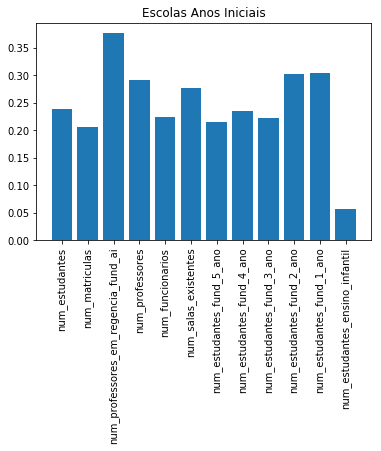

In [74]:
corr_variables3 = ['num_estudantes','num_matriculas','num_professores_em_regencia_fund_ai','num_professores','num_funcionarios','num_salas_existentes','num_estudantes_fund_5_ano','num_estudantes_fund_4_ano','num_estudantes_fund_3_ano','num_estudantes_fund_2_ano','num_estudantes_fund_1_ano','num_estudantes_ensino_infantil']
plotCorr(esc_ai,corr_variables3,'Ideb2017','Escolas Anos Iniciais')
#textCorr(result_est,corr_variables3,'Ideb2017')

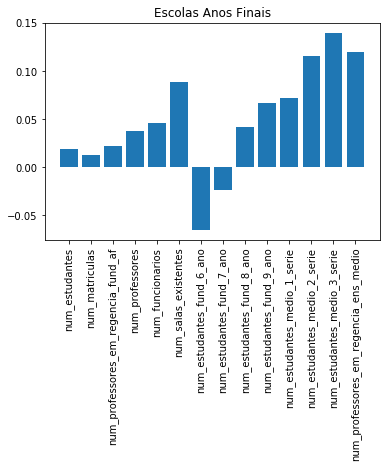

In [59]:
corr_variables4 = ['num_estudantes','num_matriculas','num_professores_em_regencia_fund_af','num_professores','num_funcionarios','num_salas_existentes','num_estudantes_fund_6_ano','num_estudantes_fund_7_ano','num_estudantes_fund_8_ano','num_estudantes_fund_9_ano','num_estudantes_medio_1_serie','num_estudantes_medio_2_serie','num_estudantes_medio_3_serie','num_professores_em_regencia_fund_af','num_professores_em_regencia_ens_medio']
plotCorr(esc_af,corr_variables4,'Ideb2017','Escolas Anos Finais')
#textCorr(result_est,corr_variables4,'Ideb2017')

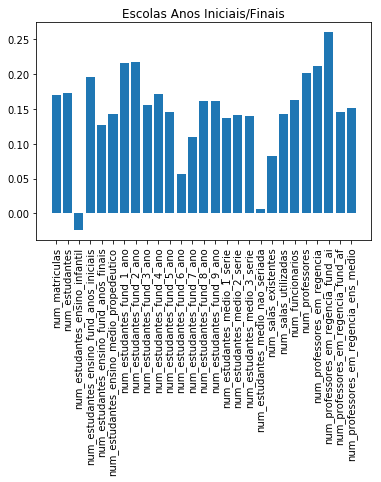

In [75]:
corr_variables5 = ['num_matriculas','num_estudantes','num_estudantes_ensino_infantil','num_estudantes_ensino_fund_anos_iniciais','num_estudantes_ensino_fund_anos_finais','num_estudantes_ensino_medio_propedeutico','num_estudantes_fund_1_ano','num_estudantes_fund_2_ano','num_estudantes_fund_3_ano','num_estudantes_fund_4_ano','num_estudantes_fund_5_ano','num_estudantes_fund_6_ano','num_estudantes_fund_7_ano','num_estudantes_fund_8_ano','num_estudantes_fund_9_ano','num_estudantes_medio_1_serie','num_estudantes_medio_2_serie','num_estudantes_medio_3_serie','num_estudantes_medio_nao_seriada','num_salas_existentes','num_salas_utilizadas','num_funcionarios','num_professores','num_professores_em_regencia','num_professores_em_regencia_fund_ai','num_professores_em_regencia_fund_af','num_professores_em_regencia_ens_medio']
plotCorr(esc_aiaf1,corr_variables5,'Ideb2017','Escolas Anos Iniciais/Finais')
#textCorr(result_est,corr_variables5,'Ideb2017')

Mais insights podem ser tirados desses dados:
    1. O ideb é significativamente influenciado pelo número de alunos por série, como um trend universal, quanto maior a quantidade de alunos de anos mais iniciais, comparado ao finais, maior a correlação entre a escola e uma nota boa no Ideb
    2. As escolas que somente tem alunos de anos iniciais tem uma média do Ideb superior a qualquer outro tipo, enquanto escolas que só possuem alunos do EF2 e EM tendem a ter médias no Ideb inferiores:
        Total Escolas: 5.086005430728387
        Escola Inicial: 5.614108665944125
        Escola Final: 4.5496970309028475
        Escola Inicial/Final: 4.921775339108156
    3. Dentro do grupo de escolas que só tem alunos de anos finais, ainda existe a separação daquelas que são só ensino médio, e aquelas que dão o EF2 e médio. Podemos observar que a tendência é que quanto mais focado no EM, melhor o Ideb, pois existe correlação negativa dos alunos de sexto e sétimo ano mesmo entre as AF
    4. Também observamos um fenômeno no qual nas escolas apenas de anos finais, a correlação entre o num_alunos e o Ideb é quase nula, o que não ocorre nos outros grupos, que tendem a possuir uma correlação positiva. Ou seja, nos outros grupos de escolas, quanto mais alunos, tende a ter um Ideb maior, o que não ocorre em escolas AF.
    5. Em escolas AI/AF não percebemos esse trend que vimos nos outros grupos, a correlação entre número de alunos por séries se mantém semi constante entre todas as séries (tirando o caso do 6 ano, que parece ser um ano crítico), o que mostra que o salto intenso que observamos no dataset com todas as escolas se da pela sistemática notas mais baixas para escolas de AF e mais altas pra escolas de AI, o que pode ser um indício de um viés que é dado pela métrica.